### Code Implementation

In [7]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

### Loading Dataset

In [2]:
# # Loading the dataset and perform splitting
# data_list = []
# labels_list = []
# classes_list = 43

# imgs_path = "../input/gtsrb-german-traffic-sign/Train"
# for i in range(classes_list):
#     i_path = os.path.join(imgs_path, str(i)) #0-42
#     for img in os.listdir(i_path):
#         im = Image.open(i_path +'/'+ img)
#         im = im.resize((32,32))
#         im = np.array(im)
#         data_list.append(im)
#         labels_list.append(i)
# data = np.array(data_list)
# labels = np.array(labels_list)

In [8]:
# Opening file for reading in binary mode
#- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization
with open('D:\Project\Traffic Sign Detection\DATABASE/data3.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

train_imgs = data['x_train']
test_imgs = data['x_test']
valid_imgs = data['x_validation']
train_labels = data['y_train']
test_labels = data['y_test']
valid_labels = data['y_validation']

In [4]:
train_labels

array([37, 27, 38, ..., 11, 14, 30], dtype=int64)

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    plt.imshow(image1)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1


#new = augment_brightness_camera_images(image)
new = preprocess_img(image)
#plt.imshow(new)
print(new.shape)
print(cycle)

In [9]:
A = np.array(np.where(train_labels >= 18))
A = np.concatenate((A ,np.where(train_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(train_labels == 11)), axis = 1)
B = np.array(np.where(train_labels > 31))
indx = np.setdiff1d(A, B)

A = np.array(np.where(test_labels >= 18)) 
A = np.concatenate((A ,np.where(test_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(test_labels == 11)), axis = 1)
B = np.array(np.where(test_labels > 31))
indx1 = np.setdiff1d(A, B)

A = np.array(np.where(valid_labels >= 18)) 
A = np.concatenate((A ,np.where(valid_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(valid_labels == 11)), axis = 1)
B = np.array(np.where(valid_labels > 31))
indx2 = np.setdiff1d(A, B)

tri_X_train = train_imgs[indx]
tri_X_test = test_imgs[indx1]
tri_X_valid = valid_imgs[indx2]
tri_train_labels = train_labels[indx]
tri_test_labels = test_labels[indx1]
tri_valid_labels = valid_labels[indx2]

In [6]:
tri_train_labels.shape

(32368,)

In [10]:
tri_Dict = {11:0 , 13:1 , 18:2 , 19:3 , 20:4 , 21:5 , 22:6 , 23:7 , 24:8 , 25:9 , 26:10 , 27:11 , 28:12 , 29:13 , 30:14 , 31:15 }
tri_train_labels = np.vectorize(tri_Dict.get)(tri_train_labels)
tri_test_labels = np.vectorize(tri_Dict.get)(tri_test_labels)
tri_valid_labels = np.vectorize(tri_Dict.get)(tri_valid_labels)
tri_num_class = 16

In [8]:
tri_train_labels

array([11, 12, 13, ...,  2,  0, 14])

from skimage import color, exposure, transform

NUM_CLASSES = 43
IMG_SIZE = 48

def preprocess_img(img):
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

#     # central square crop
#     min_side = min(img.shape[:-1])
#     centre = img.shape[0]//2, img.shape[1]//2
#     img = img[centre[0]-min_side//2:centre[0]+min_side//2,
#     centre[1]-min_side//2:centre[1]+min_side//2,
#                   :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

### Image Data Preprocessing

In [9]:
tri_X_train.shape

(32368, 32, 32, 3)

In [11]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = tri_X_train
x_test = tri_X_test
x_valid = tri_X_valid

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 16

# One Hot Encoding
y_train = keras.utils.to_categorical(tri_train_labels, 16)
y_test = keras.utils.to_categorical(tri_test_labels, 16)
y_valid = keras.utils.to_categorical(tri_valid_labels, 16)

In [46]:
keras.backend.clear_session()

### LeNet Model Architecture

In [12]:
# Building the Model Architecture
# model = Sequential()
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))#************
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(16, activation='softmax'))#********************
#Definition of the DNN model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.add(Dense(16, activation='softmax'))


model = keras.Sequential()
chanDim = -1


    # CONV => RELU => BN => POOL
model.add(Conv2D(8, (5, 5), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

    # first set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(16, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(16, (6, 6), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.35))

    # second set of (CONV => RELU => CONV => RELU) * 2 => POOL
model.add(Conv2D(32, (8, 8), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (8, 8), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.45))

    # first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

    # second set of FC => RELU layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

    # softmax classifier
model.add(Dense(16))
model.add(Activation("softmax"))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         608       
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 8)        32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        3

In [15]:
import visualkeras
visualkeras.layered_view(model)

ModuleNotFoundError: No module named 'visualkeras'

In [13]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [41]:
print(x_train.shape , x_test.shape)

(32368, 32, 32, 3) (3510, 32, 32, 3)


In [14]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/50
253/253 [==============================] - 15s 30ms/step - loss: 3.1106 - accuracy: 0.1215 - val_loss: 2.3055 - val_accuracy: 0.2419
Epoch 2/50
253/253 [==============================] - 6s 25ms/step - loss: 2.0088 - accuracy: 0.3531 - val_loss: 1.2597 - val_accuracy: 0.6147
Epoch 3/50
253/253 [==============================] - 6s 25ms/step - loss: 1.1576 - accuracy: 0.6267 - val_loss: 0.7337 - val_accuracy: 0.7946
Epoch 4/50
253/253 [==============================] - 6s 25ms/step - loss: 0.6962 - accuracy: 0.7830 - val_loss: 0.5435 - val_accuracy: 0.8581
Epoch 5/50
253/253 [==============================] - 6s 25ms/step - loss: 0.4854 - accuracy: 0.8545 - val_loss: 0.4266 - val_accuracy: 0.8907
Epoch 6/50
253/253 [==============================] - 6s 26ms/step - loss: 0.3621 - accuracy: 0.8916 - val_loss: 0.3392 - val_accuracy: 0.9163
Epoch 7/50
253/253 [==============================] - 6s 25ms/step - loss: 0.2879 - accuracy: 0.9130 - val_loss: 0.3372 - val_accuracy: 0.920

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

In [52]:
model.count_params()

197104

In [25]:
def classifiy(pred ):
    n = pred.shape[0]
    nc = pred.shape[1]
    new_cy_y = np.zeros((n))
    for i in range(0 ,nc):
        cycle_indx = np.where(pred[:,i] == 1)
        new_cy_y[cycle_indx] = i
    return new_cy_y

In [ ]:
pred = model.predict(x_test)
cr = classification_report(classifiy(pred) , classifiy(y_test))
print(cr)

In [32]:
model_pkl_file = "D:\Project\Traffic Sign Detection\TrainedMOdel\final\tri_classifier_model_acc75.h5"
model.save(model_pkl_file)


In [31]:
from keras.models import load_model

model = load_model("D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\tri_classifier_model_acc96.h5")

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

110/110 [==============================] - 1s 9ms/step - loss: 320.6290 - accuracy: 0.1197
Test Loss: 320.62896728515625
Test accuracy: 0.11965811997652054


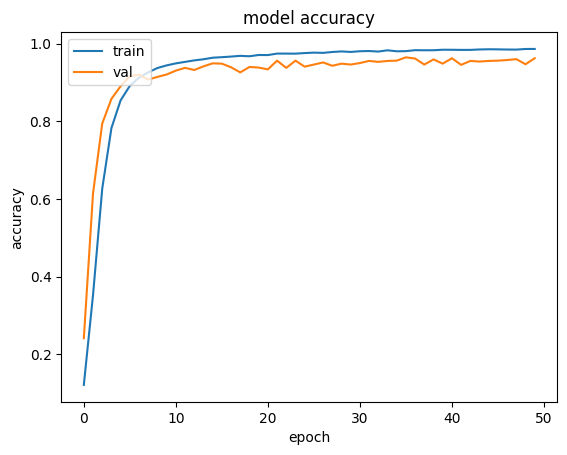

In [17]:
history = hist
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

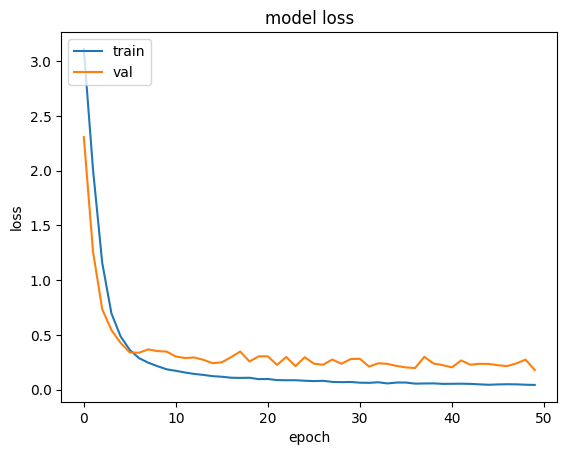

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Hope you like it!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


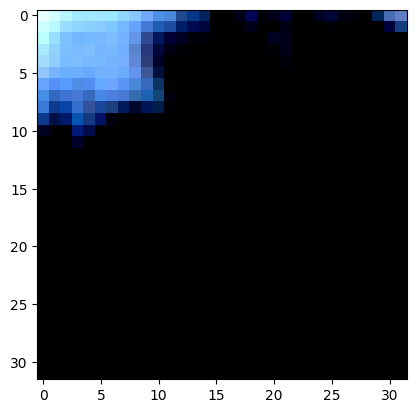

1/1 [==============================] - 1s 955ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [18]:
from matplotlib import pyplot as plt
image = x_train[65:66,:,:]#.transpose(2 , 0 ,1)
plt.imshow(image[0].reshape((32,32,3)))
plt.show()
#y = model.predict_classes(image)
y = (model.predict(image) > 0.5).astype("int32")
print(y[0])
print(y_train[65:66])

ValueError: cannot reshape array of size 3072 into shape (32,32)

In [ ]:
import numpy
x = numpy.where(gray_train_labels == 2)